# Evaneszente Lichtstreuung

## initial imports

In [1]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import scipy.constants as con
import uncertainties as un
import uncertainties.unumpy as unp
from scipy.signal import find_peaks,find_peaks_cwt
import scipy.signal as sig
import scipy.special as sp
import scienceplots
plt.figure()
plt.style.use('science')
plt.rcParams['errorbar.capsize'] = 5
plt.rcParams['text.usetex'] = False # disable latex
plt.rcParams['figure.dpi'] = 150
import os
import fp

<Figure size 640x480 with 0 Axes>

In [2]:
#aliases
from uncertainties import ufloat as uf
from uncertainties.unumpy import uarray as ua
from uncertainties.unumpy import nominal_values as nv
from uncertainties.unumpy import std_devs as sd

In [3]:
outdir = f'plots/evaneszenz/'
datadir = f'data/evaneszenz/'
os.makedirs(outdir, exist_ok=True)

In [4]:
files1 = ['no_trap_3.avi_coord_new.txt','trap_0_80V.avi_coord_new.txt','trap_0_90V.avi_coord_new.txt', 'trap_1_00V.avi_coord_new.txt']
files2 = ['messung_1_2023-11-08_11-34-24.dat', 'messung_2_2023-11-08_11-53-21.dat', 'messung_3_2023-11-08_14-01-37.dat', 'messung_4_2023-11-08_14-17-39.dat', 'messung_5_2023-11-08_14-40-51.dat' ]

## XY Plane

In [5]:
data1 = []*len(files1)
for i, f in enumerate(files1):
    data1.append(pd.read_csv(datadir + 'part 1/' + f,sep="\t",header=None))

In [6]:
data1_labels= ['no trap', 'trap 0.8V', 'trap 0.9V', 'trap 1.0V']

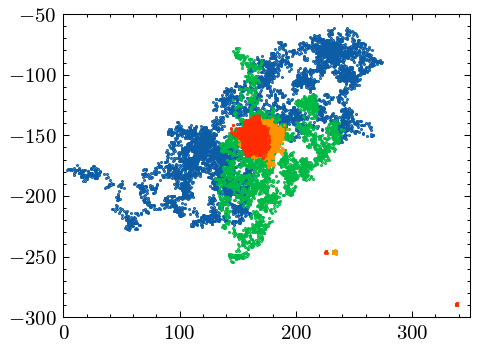

In [7]:
plt.figure()
for i, dat in enumerate(data1):
    plt.scatter(dat[0],-dat[1],label=data1_labels[i],s=0.2)
    # dat2 = dat.drop(dat[dat[1]+dat[0]>460].index)
    # plt.plot(dat2[0],-dat2[1],label=data1_labels[i])
    # dat2.to_csv(f"{datadir}part_1_messung_{i+1}.tsv",sep="\t",header=None,index=None)
# plt.legend()
plt.xlim(0,350)
plt.ylim(-300,-50)
plt.savefig(outdir + 'path_scatter.pdf')

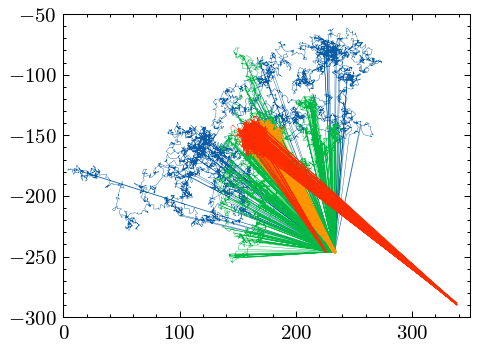

In [8]:
plt.figure()
for i, dat in enumerate(data1):
    plt.plot(dat[0],-dat[1],label=data1_labels[i],lw=0.2)
    # dat2 = dat.drop(dat[dat[1]+dat[0]>460].index)
    # plt.plot(dat2[0],-dat2[1],label=data1_labels[i])
    # dat2.to_csv(f"{datadir}part_1_messung_{i+1}.tsv",sep="\t",header=None,index=None)
# plt.legend()
plt.xlim(0,350)
plt.ylim(-300,-50)
plt.savefig(outdir + 'path_plot.pdf')

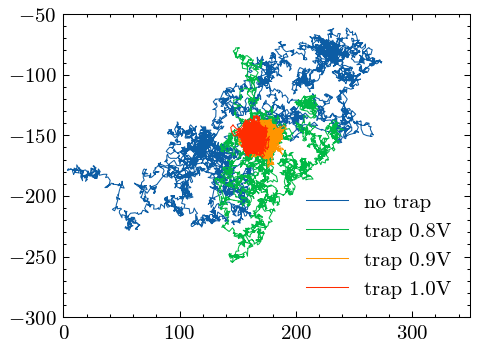

In [9]:
plt.figure()
for i, dat in enumerate(data1):
    # plt.plot(dat[0],-dat[1],label=i+1)
    dat2 = dat.drop(dat[dat[1]+dat[0]>460].index)
    plt.plot(dat2[0],-dat2[1],label=data1_labels[i],lw=0.5)
    # dat2.to_csv(f"{datadir}part_1_messung_{i+1}.tsv",sep="\t",header=None,index=None)

plt.legend()

plt.xlim(0,350)
plt.ylim(-300,-50)
plt.savefig(outdir + 'path_cleaned.pdf')

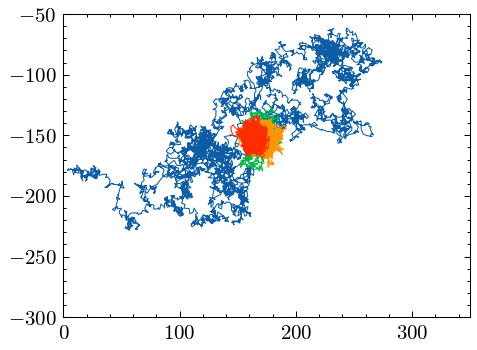

In [10]:
plt.figure()
a,b= 1250,3400
c,d= 5000,7361
for i, dat in enumerate(data1):
    dat2 = dat.drop(dat[dat[1]+dat[0]>460].index)

    if i != 1:
        plt.plot(dat2[0],-dat2[1],label=i+1,lw=0.5)
    else:
    # plt.plot(dat[0],-dat[1],label=i+1)
        plt.plot(dat2[0][a:b],-dat2[1][a:b],lw=0.5,label=i+1)
        # plt.plot(dat2[0][c:d],-dat2[1][c:d],lw=0.5,label=i+1)
    # dat2[a:b].to_csv(f"{datadir}part_1_messung_{i+1}_interval_1.txt",sep="\t",header=None,index=None)

plt.xlim(0,350)
plt.ylim(-300,-50)
# plt.legend()
plt.savefig(outdir + 'path_interval.pdf')

In [11]:
len(data1[1])

7361

## Z Movement

In [12]:
i_0 = [7,0.46,2.4,2,1.1] # geichte intensität
lamb = [156, 156, 156, 156, 251] # eindringtiefe in nm 1
v2 = [0.9,1, 1.1, 0, 1 ]
f2 = [1.28e07, 1.00e07, 3.86e06, 0 , 8.36e06]
kbT = con.k*308 # at 310K = 273 + 25
data2_labels = ['trap 0.9V', 'trap 1.0V', 'trap 1.1V', 'no trap', '1.0V higher penetration depth']

In [13]:
def i(z, i_0, lamb):
    return i_0*np.exp(-z/lamb)

def z(i, i_0, lamb):
    return - np.log(i/i_0)*lamb

In [14]:
data2 = []*len(files2)
for i, f in enumerate(files2):
    data2.append(pd.read_csv(datadir + 'part 2/' +f,header=None))

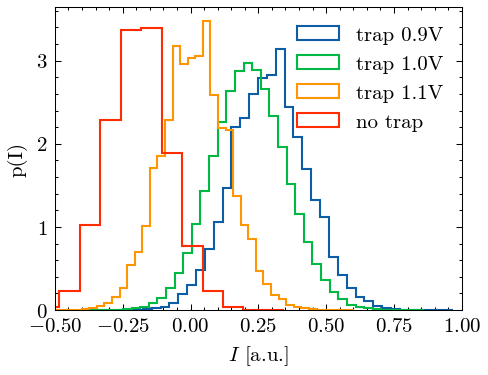

In [15]:
plt.figure()
for i, dat in enumerate(data2):
    if i < 4:
        plt.hist(dat[1],bins=40,density=True,histtype='step',label=f"{data2_labels[i]}")

plt.xlim(-0.5,1)
plt.legend()

plt.ylabel("p(I)")
plt.xlabel("$I$ [a.u.]")
plt.savefig(outdir + 'hist_intensity_trapped.pdf')

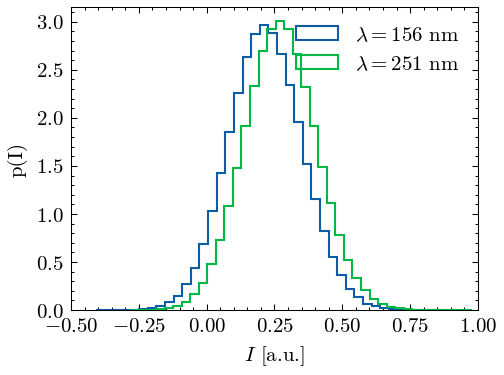

In [16]:
plt.figure()

plt.hist(data2[1][1],bins=40,density=True,histtype='step',label=rf"$\lambda = {lamb[1]}$ nm")
plt.hist(data2[4][1],bins=40,density=True,histtype='step',label=rf"$\lambda = {lamb[4]}$ nm")

plt.xlim(-0.5,1)
plt.legend()

plt.ylabel("p(I)")
plt.xlabel("$I$ [a.u.]")
plt.savefig(outdir + 'hist_intensity_lambda.pdf')

/home/emil/Dokumente/code/uni/FP2/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


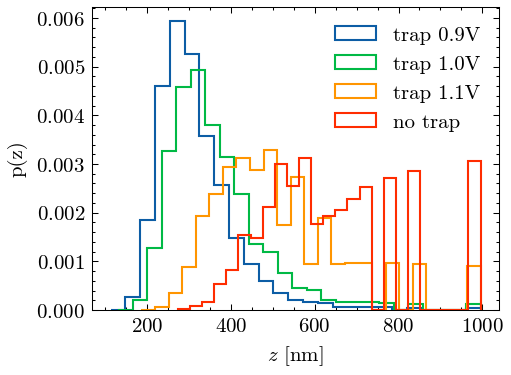

In [17]:
plt.figure()
for i,( dat , i_0p, lp)  in enumerate(zip(data2, i_0, lamb)):
    if i >= 4:
        continue
    zp = z(dat[1], 2, lp)
    plt.hist(zp,bins=25,density=True,histtype='step',label=f"{data2_labels[i]}")

# plt.xlim(-0.5,1)
plt.legend()

plt.ylabel("p(z)")
plt.xlabel("$z$ [nm]")
plt.savefig(outdir + 'hist_z_trapped.pdf')

In [18]:
def pot(z, a, b, c, d, e):
    return a*np.exp(-b*(z-c)) + d*(z-c) + e

/home/emil/Dokumente/code/uni/FP2/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_64989/1035576371.py:8: RuntimeWarning: divide by zero encountered in log
  vz = -np.log(zh[0])


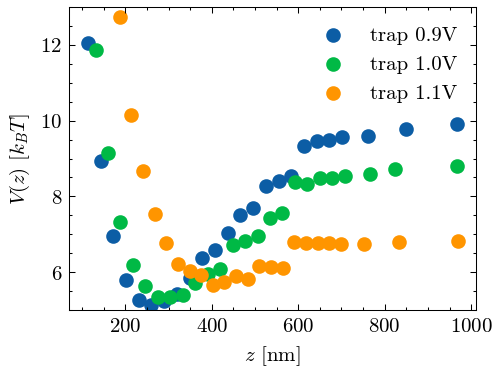

In [19]:
plt.figure()
for i,( dat , i_0p, lp)  in enumerate(zip(data2, i_0, lamb)):
    if i >= 3:
        continue
    zp = np.array(z(dat[1], 2, lp))
    # print(min(zp),max(zp))
    zh = np.histogram(zp,range=(min(zp),max(zp)),bins=30,density=True)
    vz = -np.log(zh[0])
    # print(zh,vz)
    # remove nan and inf
    zc = zh[1][:-1][~np.isnan(vz)]
    vz = vz[~np.isnan(vz)]
    zc = zc[~np.isinf(vz)]
    vz = vz[~np.isinf(vz)]
    plt.scatter(zc,vz,label=f"{data2_labels[i]}")
    # cov, pcov = curve_fit(pot,zc,vz)
    # plt.plot(zc,pot(zc,*cov),label=f"{data2_labels[i]} fit")
# plt.xlim(-0.5,1)
plt.legend()
plt.ylim(5,13)

plt.ylabel("$V(z)$ [$k_BT$]")
plt.xlabel("$z$ [nm]")
plt.savefig(outdir + 'potential_trapped.pdf')

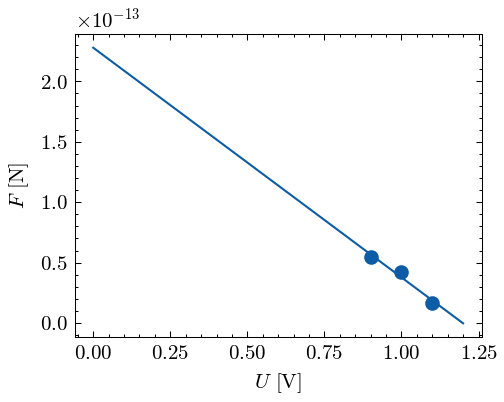

In [20]:
def linfit(x,a,b):
    return a*x+b
plt.figure()
plt.scatter(v2[:3],np.array(f2[:3])*kbT)
cov, pcov = curve_fit(linfit,v2[:3],np.array(f2[:3])*kbT)

print 
vl = np.linspace(0,1.2,100)
plt.plot(vl,linfit(vl,*cov),label=f"fit: {uf(cov[0],pcov[0][0])}x + {uf(cov[1],pcov[1][1])}")

plt.ylabel("$F$ [N]")
plt.xlabel("$U$ [V]")
plt.savefig(outdir + 'force_extrapolation.pdf')

/tmp/ipykernel_64989/2194249924.py:5: RuntimeWarning: invalid value encountered in log
  return - np.log(i/i_0)*lamb


Text(0.5, 0, 'z [nm]')

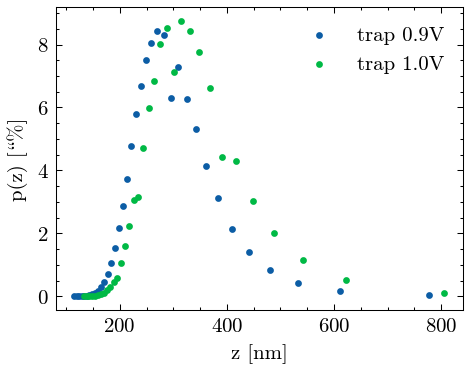

In [21]:
plt.figure()
for i,( dat , i_0p, lp)  in enumerate(zip(data2, i_0, lamb)):
    if i >= 2:
        continue
    ni = np.histogram(dat[1],bins=50)
    ip = (ni[1][:-1]+ni[1][1:])/2
    zp = np.array(z(ip, 2, lp))
    
    plt.scatter(zp,ni[0]*ip*100/np.sum(ni[0]*ip),label=f"{data2_labels[i]}",s=5)
    # plt.plot(np.log(ip*zp),label=f"{data2_labels[i]}")
    # print(ni[1])

# plt.xlim(-0.5,1)
plt.legend()

plt.ylabel("p(z) [\%]")
plt.xlabel("z [nm]")
# plt.savefig(outdir + 'prob_z_trapped.pdf'plot)

/home/emil/Dokumente/code/uni/FP2/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


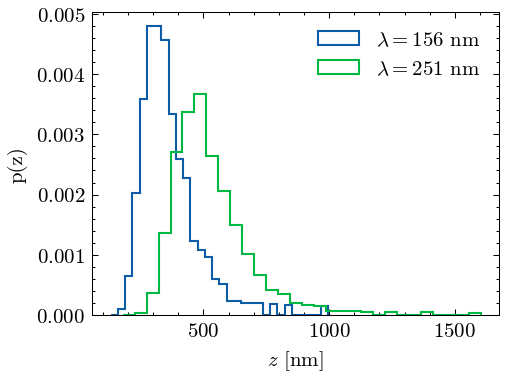

In [22]:
plt.figure()

plt.hist(z(data2[1][1], 2, lamb[1]),bins=30,density=True,histtype='step',label=rf"$\lambda = {lamb[1]}$ nm")
plt.hist(z(data2[4][1], 2, lamb[4]),bins=30,density=True,histtype='step',label=rf"$\lambda = {lamb[4]}$ nm")

# plt.xlim(-0.5,1)
plt.legend()

plt.ylabel("p(z)")
plt.xlabel("$z$ [nm]")
plt.savefig(outdir + 'hist_z_lambda_i0_2.pdf')

/home/emil/Dokumente/code/uni/FP2/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


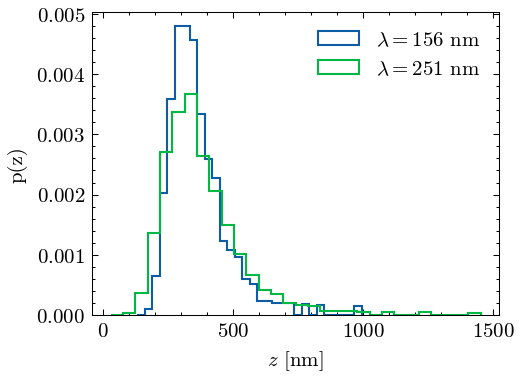

In [23]:
plt.figure()

plt.hist(z(data2[1][1], 2, lamb[1]),bins=30,density=True,histtype='step',label=rf"$\lambda = {lamb[1]}$ nm")
plt.hist(z(data2[4][1], 1.1, lamb[4]),bins=30,density=True,histtype='step',label=rf"$\lambda = {lamb[4]}$ nm")

# plt.xlim(-0.5,1)
plt.legend()

plt.ylabel("p(z)")
plt.xlabel("$z$ [nm]")
plt.savefig(outdir + 'hist_z_lambda_comp.pdf')

/home/emil/Dokumente/code/uni/FP2/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_64989/1265230816.py:12: RuntimeWarning: divide by zero encountered in log
  vz = -np.log(zh[0])


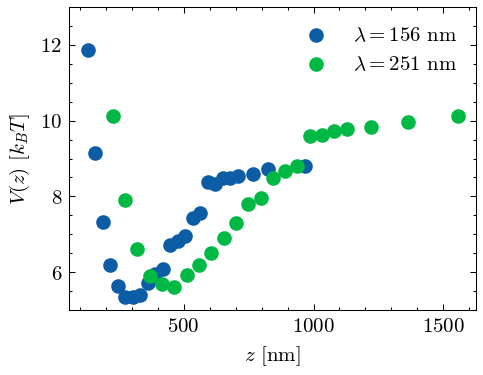

In [24]:
plt.figure()
for i,( dat , i_0p, lp)  in enumerate(zip(data2, i_0, lamb)):
    if i != 1 and i != 4:
        continue
    if i == 1:
        zp = np.array(z(dat[1], 2, lp))
    elif i == 4:
        zp = np.array(z(dat[1], 2, lp))
    # zp = np.array(z(dat[1], 2, lp))
    # print(min(zp),max(zp))
    zh = np.histogram(zp,range=(min(zp),max(zp)),bins=30,density=True)
    vz = -np.log(zh[0])
    # print(zh,vz)
    # remove nan and inf
    zc = zh[1][:-1][~np.isnan(vz)]
    vz = vz[~np.isnan(vz)]
    zc = zc[~np.isinf(vz)]
    vz = vz[~np.isinf(vz)]
    plt.scatter(zc,vz,label=rf"$\lambda = {lp}$ nm")
    # cov, pcov = curve_fit(pot,zc,vz)
    # plt.plot(zc,pot(zc,*cov),label=f"{data2_labels[i]} fit")
# plt.xlim(-0.5,1)
plt.legend()
plt.ylim(5,13)

plt.ylabel("$V(z)$ [$k_BT$]")
plt.xlabel("$z$ [nm]")
plt.savefig(outdir + 'potential_lambda_i0_2.pdf')

/home/emil/Dokumente/code/uni/FP2/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_64989/280984734.py:12: RuntimeWarning: divide by zero encountered in log
  vz = -np.log(zh[0])


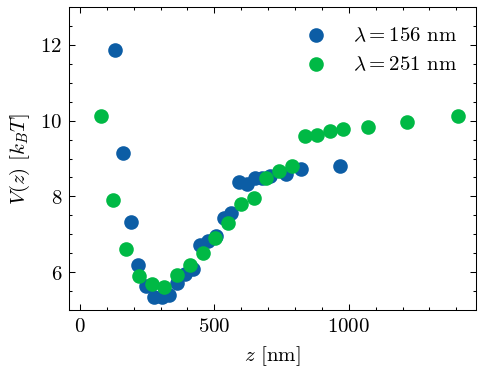

In [25]:
plt.figure()
for i,( dat , i_0p, lp)  in enumerate(zip(data2, i_0, lamb)):
    if i != 1 and i != 4:
        continue
    if i == 1:
        zp = np.array(z(dat[1], 2, lp))
    elif i == 4:
        zp = np.array(z(dat[1], 1.1, lp))
    # zp = np.array(z(dat[1], 2, lp))
    # print(min(zp),max(zp))
    zh = np.histogram(zp,range=(min(zp),max(zp)),bins=30,density=True)
    vz = -np.log(zh[0])
    # print(zh,vz)
    # remove nan and inf
    zc = zh[1][:-1][~np.isnan(vz)]
    vz = vz[~np.isnan(vz)]
    zc = zc[~np.isinf(vz)]
    vz = vz[~np.isinf(vz)]
    plt.scatter(zc,vz,label=rf"$\lambda = {lp}$ nm")
    # cov, pcov = curve_fit(pot,zc,vz)
    # plt.plot(zc,pot(zc,*cov),label=f"{data2_labels[i]} fit")
# plt.xlim(-0.5,1)
plt.legend()
plt.ylim(5,13)

plt.ylabel("$V(z)$ [$k_BT$]")
plt.xlabel("$z$ [nm]")
plt.savefig(outdir + 'potential_lambda.pdf')

/home/emil/Dokumente/code/uni/FP2/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'z Position [a.u.]')

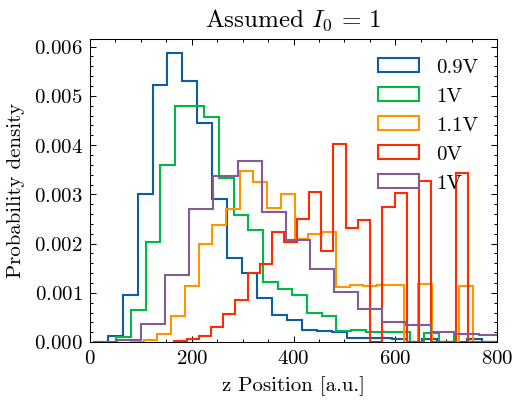

In [26]:
plt.figure()
for i,( dat , i_0p, lp)  in enumerate(zip(data2, i_0, lamb)):
    zp = z(dat[1], 1, lp)
    plt.hist(zp,bins=30,density=True,histtype='step',label=f"{v2[i]}V")

plt.xlim(0,800)
plt.legend()

plt.title("Assumed $I_0$ = 1")
plt.ylabel("Probability density")
plt.xlabel("z Position [a.u.]")